In [77]:
import numpy as np
import matplotlib.pyplot as plt


In [78]:
# Loading data:
data_file_path = "MNIST-5-6-Subset.txt"
data_matrix = np.loadtxt(data_file_path).reshape(1877, 784)
labels_file_path = "MNIST-5-6-Subset-Labels.txt"
labels = np.loadtxt(labels_file_path)

# Changing the labels to indicators
indicator_labels = (labels-5)*2-1

# Visualize the image using Matplotlib
# image_index = 0
# image_data = data_matrix[image_index]
# selected_label = int(indicator_labels[image_index])
# We transpose the image to make the number look upright.
# plt.imshow(image_data.reshape(28,28).transpose(1,0), cmap='gray')
# plt.title(f"Label: {selected_label}")
# plt.axis('off') # Turn off axis
# plt.show()

In [79]:
def knn(training_points, training_labels, test_points, test_labels):
    m = training_points.shape[0]
    n = test_points.shape[0]

    # Calculates dot products
    training_dot_training = np.dot(training_points, np.transpose(training_points))
    training_dot_test = np.dot(training_points, np.transpose(test_points))
    test_dot_test = np.dot(test_points, np.transpose(test_points))
    
    # Formula from assignment text
    fst_part = np.outer(np.diag(training_dot_training), np.transpose(np.ones(n)))
    snd_part = 2 * training_dot_test
    trd_part = np.outer(np.transpose(np.ones(m)), np.transpose(np.diag(test_dot_test)))

    # All distances as m x n matrix (from assignment text)
    distances = np.transpose(fst_part - snd_part + trd_part)

    # Sorted indices
    indices = np.argsort(distances)

    # Count the majority vote for all K closest points     
    Y = list(map(lambda x, y: np.sign(np.cumsum((training_labels[x] == y)*2-1)), indices, test_labels))

    # m-vector of average error of K-nn
    return 1 - abs(sum(Y) / n)

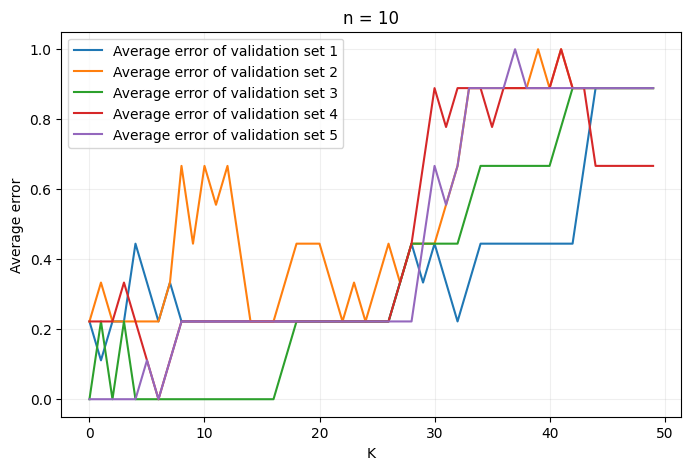

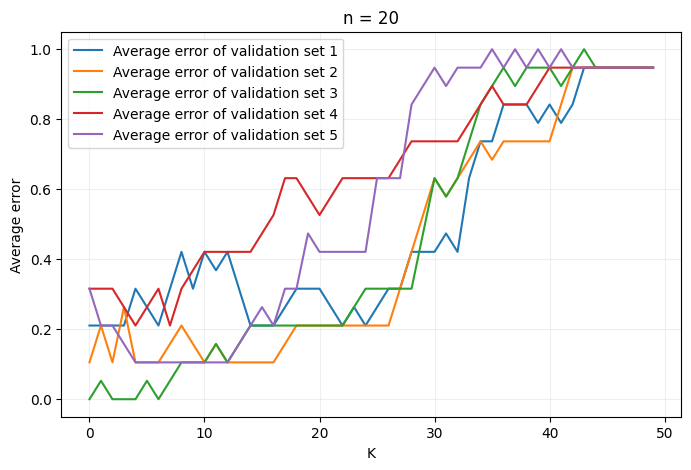

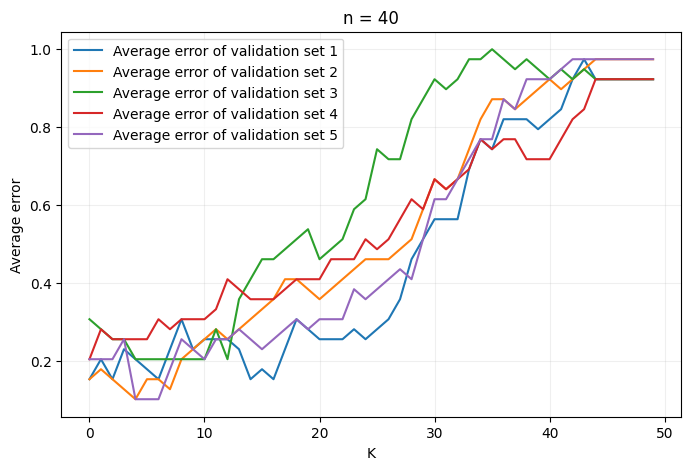

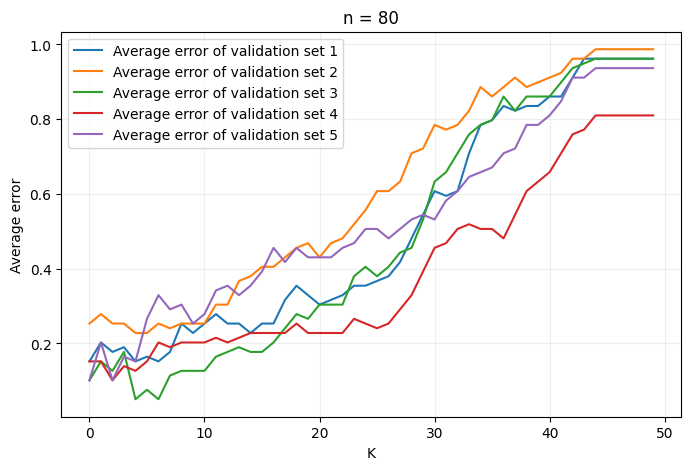

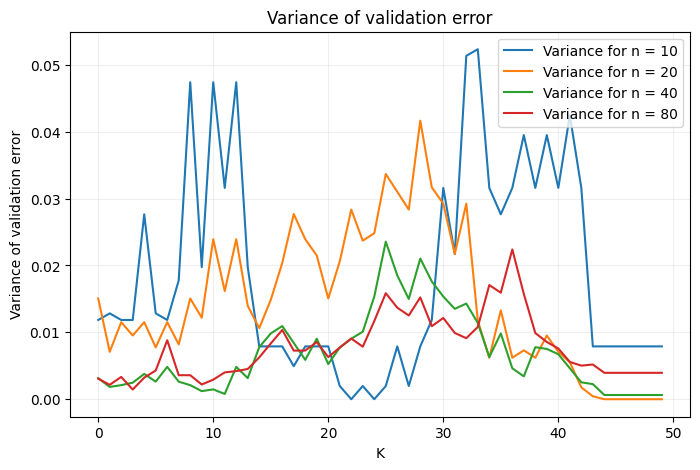

In [80]:
m = 50
n = 80


training_data = data_matrix[:m]
training_labels = indicator_labels[:m]

# Returns the m-vector of average error on a given n
def validation(data, labels, i, m, n):
    validation_data = data[m + (i - 1) * n + 1 : m + i * n]
    validation_labels = labels[m + (i - 1) * n + 1 : m + i * n]
    return knn(training_data, training_labels, validation_data, validation_labels)

# Performs the experiment (on 5 validation sets) of a given n
# Returns the variance of the average error of the individual validation sets
def experiment(data, labels, m, n):
    x = np.arange(0, m, 1)
    Y = list(map(lambda i : validation(data, labels, i, m, n), range(1, 6)))


    # Initialise figure (fig) and axis (ax)
    fig, ax = plt.subplots(figsize=(8,5))

    # Plot in axis, add label to data
    for i, y in enumerate(Y):
        ax.plot(x, y, label=f'Average error of validation set {i+1}') # (*)

    # Meta data
    ax.set_xlabel('K')
    ax.set_ylabel('Average error')
    ax.set_title(f'n = {n}')
    ax.grid(alpha=0.2)
    ax.legend()

    # Save plot to some local path
    fig.savefig(f'AverageError_n={n}.png')
    
    plt.show()

    # Return the variance for all validation sets given n
    return np.var(np.transpose(Y), 1)


N = [10, 20, 40, 80]

# Performs the experiment for each n  
variance_data = list(map(lambda n : experiment(data_matrix, indicator_labels, m, n), N)) 

# Initialise figure (fig) and axis (ax)
fig, ax_var = plt.subplots(figsize=(8,5))
x = np.arange(0, m, 1)
for var, n in zip(variance_data, N):
    ax_var.plot(x, var, label=f'Variance for n = {n}') # (*)

# Meta data
ax_var.set_xlabel('K')
ax_var.set_ylabel('Variance of validation error')
ax_var.set_title(f'Variance of validation error')
ax_var.grid(alpha=0.2)
ax_var.legend()

plt.show()

# Save plot to some local path
fig.savefig('VarianceOfValidationError.png')


